In [1]:
# Our primary dataset can be found at:
# https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies
# The file is over 500MB - too big for github!

In [1]:
# import dependencies
import pandas as pd
import requests
import os
from dotenv import load_dotenv
import json
import subprocess

In [2]:
# Read the csv and store as a dataframe
tmdb_full_df = pd.read_csv("D://tmdb_database/TMDB_movie_dataset_v11.csv")

# tmdb_full_df.head()
# tmdb_full_df.dtypes
print(tmdb_full_df.columns.unique())

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords'],
      dtype='object')


In [3]:
# Select the columns required
tmdb_df = tmdb_full_df[['vote_average',
                        'vote_count',
                        'release_date',
                        'revenue',
                        'runtime',
                        'budget',
                        'imdb_id',
                        'overview',
                        'popularity',
                        'tagline',
                        'genres',
                        'production_companies',
                        'spoken_languages',
                        'keywords']]

In [4]:
# Convert "release_date" to datetime
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'])
# print(tmdb_df.dtypes)


C:\Users\jeffb\AppData\Local\Temp\ipykernel_26040\2677300641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'])


In [5]:
# Split the genre strings into lists for manipulation
tmdb_df['genres'] = tmdb_df['genres'].str.split(', ')
# tmdb_df.head()

C:\Users\jeffb\AppData\Local\Temp\ipykernel_26040\1021857383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmdb_df['genres'] = tmdb_df['genres'].str.split(', ')


In [ ]:
# # Using code sourced from GTP 4o, we are verifying the genre column is cleaned up
# # This was done due to some un expected 'NoneType' errors
# # Drop rows with NaN values in the 'genres' column
# tmdb_df = tmdb_df.dropna(subset=['genres'])

# # Ensure all entries in 'genres' are lists
# tmdb_df['genres'] = tmdb_df['genres'].apply(lambda x: x if isinstance(x, list) else [x])

# # Flatten the lists in the 'genres' column
# all_genres = [genre for sublist in tmdb_df['genres'] for genre in sublist]

# # Get unique values
# unique_genres = set(all_genres)

# # Display the unique values
# unique_genres

In [6]:
# tmdb_full_df_row_count = len(tmdb_full_df)
# tmdb_df_row_count = len(tmdb_df)

# print(f'Number of rows in tmdb_full_df: {tmdb_full_df_row_count}')
# print(f'Number of rows in tmdb_df: {tmdb_df_row_count}')


Number of rows in tmdb_full_df: 1144627
Number of rows in tmdb_df: 1144627


In [7]:
# Build a list of tuples that assigns a value to each genre
# By using tuples the values are immutable
genre_map = [
    ('Action', 1),
    ('Adventure', 2),
    ('Animation', 3),
    ('Comedy', 4),
    ('Crime', 5),
    ('Documentary', 6),
    ('Drama', 7),
    ('Family', 8),
    ('Fantasy', 9),
    ('History', 10),
    ('Horror', 11),
    ('Music', 12),
    ('Mystery', 13),
    ('Romance', 14),
    ('Science Fiction', 15),
    ('TV Movie', 16),
    ('Thriller', 17),
    ('War', 18),
    ('Western', 19),
]


In [ ]:
# # Use comprehensions and lamdba to convert genres to their corresponding values

# tmdb_df['genres'] = tmdb_df['genres'].apply(lambda genres: [value for genre in genres for key, value in genre_map if genre == key])

# # Display the result
# print(tmdb_df['genres'].head())


In [ ]:
# # Set index to 'release_date' for analysis
# tmdb_df.set_index('release_date', inplace=True)
# tmdb_df.head()

In [8]:
# Sort for our target timeframe

start_time = '2014-01-01'
end_time = '2024-12-12'

sliced_df = tmdb_df[(tmdb_df['release_date'] >= start_time) & (tmdb_df['release_date'] <= end_time)]
sliced_df.shape

(404038, 14)

In [10]:
# filtered_df = tmdb_df[tmdb_df['genres'].apply(lambda x: 1 in x)]
# filtered_df = filtered_df.dropna()

# action_revenue = filtered_df['revenue'].sum()
# display(action_revenue)
# display(filtered_df.head())

TypeError: argument of type 'float' is not iterable

In [53]:
# Create a year column
sliced_df['year'] = tmdb_df['release_date'].dt.year

sliced_df['roi'] = round((tmdb_df['revenue'] / tmdb_df['budget']), 2)


In [54]:
sliced_df.head()

,vote_average,vote_count,release_date,revenue,runtime,budget,imdb_id,overview,popularity,tagline,genres,production_companies,spoken_languages,keywords,year,roi
1,8.417,32571,2014-11-05,701729206,169,165000000,tt0816692,The adventures of a group of explorers who mak...,140.241,Mankind was born on Earth. It was never meant ...,Adventure,"Legendary Pictures, Syncopy, Lynda Obst Produc...",English,"rescue, future, spacecraft, race against time,...",2014.0,4.25
1,8.417,32571,2014-11-05,701729206,169,165000000,tt0816692,The adventures of a group of explorers who mak...,140.241,Mankind was born on Earth. It was never meant ...,Drama,"Legendary Pictures, Syncopy, Lynda Obst Produc...",English,"rescue, future, spacecraft, race against time,...",2014.0,4.25
1,8.417,32571,2014-11-05,701729206,169,165000000,tt0816692,The adventures of a group of explorers who mak...,140.241,Mankind was born on Earth. It was never meant ...,Science Fiction,"Legendary Pictures, Syncopy, Lynda Obst Produc...",English,"rescue, future, spacecraft, race against time,...",2014.0,4.25
5,7.606,28894,2016-02-09,783100000,108,58000000,tt1431045,The origin story of former Special Forces oper...,72.735,Witness the beginning of a happy ending.,Action,"20th Century Fox, The Donners' Company, Genre ...",English,"superhero, anti hero, mercenary, based on comi...",2016.0,13.50
5,7.606,28894,2016-02-09,783100000,108,58000000,tt1431045,The origin story of former Special Forces oper...,72.735,Witness the beginning of a happy ending.,Adventure,"20th Century Fox, The Donners' Company, Genre ...",English,"superhero, anti hero, mercenary, based on comi...",2016.0,13.50


In [55]:
# show the revenue by year and genre

sliced_df = sliced_df.explode('genres')
sliced_df.head()

result_df = sliced_df.groupby(['year', 'genres'])['revenue'].sum()
# result_df = pd.DataFrame(result)
result_df.head()


year    genres   
2014.0  Action       16260685204
        Adventure    14391314019
        Animation     3755725278
        Comedy        9379274263
        Crime         2314112378
Name: revenue, dtype: int64

In [61]:
sliced_df.dtypes

vote_average                   float64
vote_count                       int64
release_date            datetime64[ns]
revenue                          int64
runtime                          int64
budget                           int64
imdb_id                         object
overview                        object
popularity                     float64
tagline                         object
genres                          object
production_companies            object
spoken_languages                object
keywords                        object
year                           float64
roi                            float64
dtype: object

<Axes: xlabel='year,genres'>

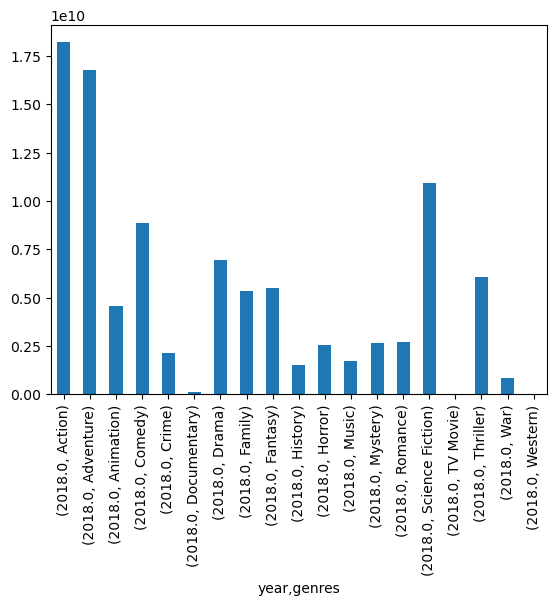

In [57]:
# result_df.plot(result_df[result_df['year']=='2014.0'])
year_df = sliced_df[sliced_df['year']==2018.0]
result_df = year_df.groupby(['year', 'genres'])['revenue'].sum()
result_df.plot(kind='bar')



<Axes: xlabel='year'>

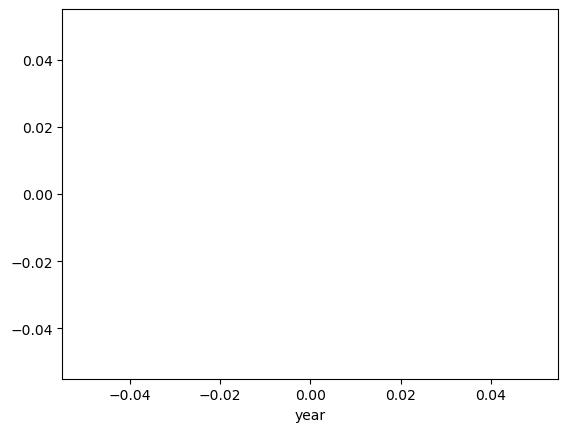

In [63]:
# Average ROI by genre and 

roi_df = sliced_df.groupby('year')['roi'].mean()
roi_df.plot()




In [ ]:
# IN PROGRESS
# finding revenue sum by year
# Initialize a dictionary to hold the revenue sums for each genre
genre_revenue = {}

# Function to update genre revenue
def update_genre_revenue(row):
    revenue = row['revenue']
    for genre in row['genres']:
        if genre in genre_revenue:
            genre_revenue[genre] += revenue
        else:
            genre_revenue[genre] = revenue

# Apply the function to each row
sliced_df.apply(update_genre_revenue, axis=1)

# Convert the dictionary to a DataFrame for better readability
revenue_by_genre = pd.DataFrame(list(genre_revenue.items()), columns=['Genre', 'Revenue'])

# Display the result

revenue_df = pd.DataFrame(revenue_by_genre)

revenue_df.sort_values